<a href="https://colab.research.google.com/github/tonyyoung3/python_stock_analysis/blob/main/EC_transcript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bs4

In [ ]:
from bs4 import BeautifulSoup
import requests
import os
import time
import re

In [ ]:
q = ['q1','q2','q3','q4']
p1 = re.compile(r'[(](.*?:.*?)[)]',re.S)
p2 = re.compile(r'[)](Q.*?)E',re.S)


In [ ]:
def parsing (url):
  if 1==1:      
    response = requests.get(url)

    soup = BeautifulSoup(response.text,"html.parser")
    texts = soup.find_all('span','article-content')

    #parse transcript
    for text in texts :
      line = 1
      year = ''
      qu = ''
      stock = ''
      
      for p in text.find_all('p'): #loop each line in transcript
          # print(p)
          if line == 1:
            pass
          if line == 2:
            # print(p.get_text())
            year = re.findall(p2,p.get_text())[0].split()[1]
            # print(year)
            qu = re.findall(p2,p.get_text())[0].split()[0]
            # print(qu)
            stock = re.findall(p1,p.get_text())[0].split(':')[1]
            # print(stock)

            try: #check if stock folder exists
              os.makedirs(stock.upper())
            except FileExistsError:
              pass
            #file name is stock quote + quarter + year
            file = stock.upper()+'/'+qu+str(year) +'.txt'
            myfile = open(file,'w')
            myfile.write(p.get_text()) #overwrite if file already exists
            myfile.close()           
          # print(url)
          else :
            file = stock.upper()+'/'+ qu+str(year) +'.txt'
            myfile = open(file,'a')
            if 'Analyst' in p.get_text():
              myfile.write(p.get_text() + ' ')
            else:
              myfile.write(p.get_text())
          line += 1
      myfile.close()
    print('Saved ' +stock + '-'+qu+str(year) + '.txt' + ' to folder '+stock.upper() )




In [ ]:
def file_gen(page,log_file):
  url = 'https://www.fool.com/author/20032/?page=' + str(page) 
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  err = open('logs/' + str(log_file) + '.txt','a')
  err.write('start'+'\n')

  links = soup.find('div','list-content')
  for a in links.find_all('a'):
    # print(a['href'])
    url = 'https://www.fool.com'+ a['href']
    try:
      parsing(url)
    except Exception as e:
      print(e)
      err.write(a['href'] + ' - ' + str(e))

    time.sleep(5)
  err.write('End processing. ' + str(i) + ' page(s) is loaded')
  err.close()


In [ ]:
from datetime import datetime
try: #check if log folder exists
  os.makedirs('logs')
except FileExistsError:
  pass
log_file = datetime.now()
log = open('logs/' + str(log_file) + '.txt','w') #create log
log.close()

for i in range(1,2): #pages you want to download
  file_gen(i,log_file)


Saved LOVE-Q22022.txt to folder LOVE
Saved JG-Q22021.txt to folder JG
Saved ASO-Q22021.txt to folder ASO
Saved VIAO-Q22021.txt to folder VIAO
Saved ZS-Q42021.txt to folder ZS
Saved VRNT-Q22022.txt to folder VRNT
Saved ZUMZ-Q22021.txt to folder ZUMZ
Saved AFRM-Q42021.txt to folder AFRM
Saved LAKE-Q22022.txt to folder LAKE
Saved CXM-Q22022.txt to folder CXM
Saved SUMO-Q22022.txt to folder SUMO
Saved KR-Q22021.txt to folder KR
Saved TIGR-Q22021.txt to folder TIGR
Saved ORCL-Q12022.txt to folder ORCL
Saved AVO-Q32021.txt to folder AVO
Saved MYTE-Q42021.txt to folder MYTE
Saved FCEL-Q32021.txt to folder FCEL
Saved ASPU-Q12022.txt to folder ASPU
Saved IBEX-Q42021.txt to folder IBEX
Saved JKS-Q22021.txt to folder JKS


Output -

# 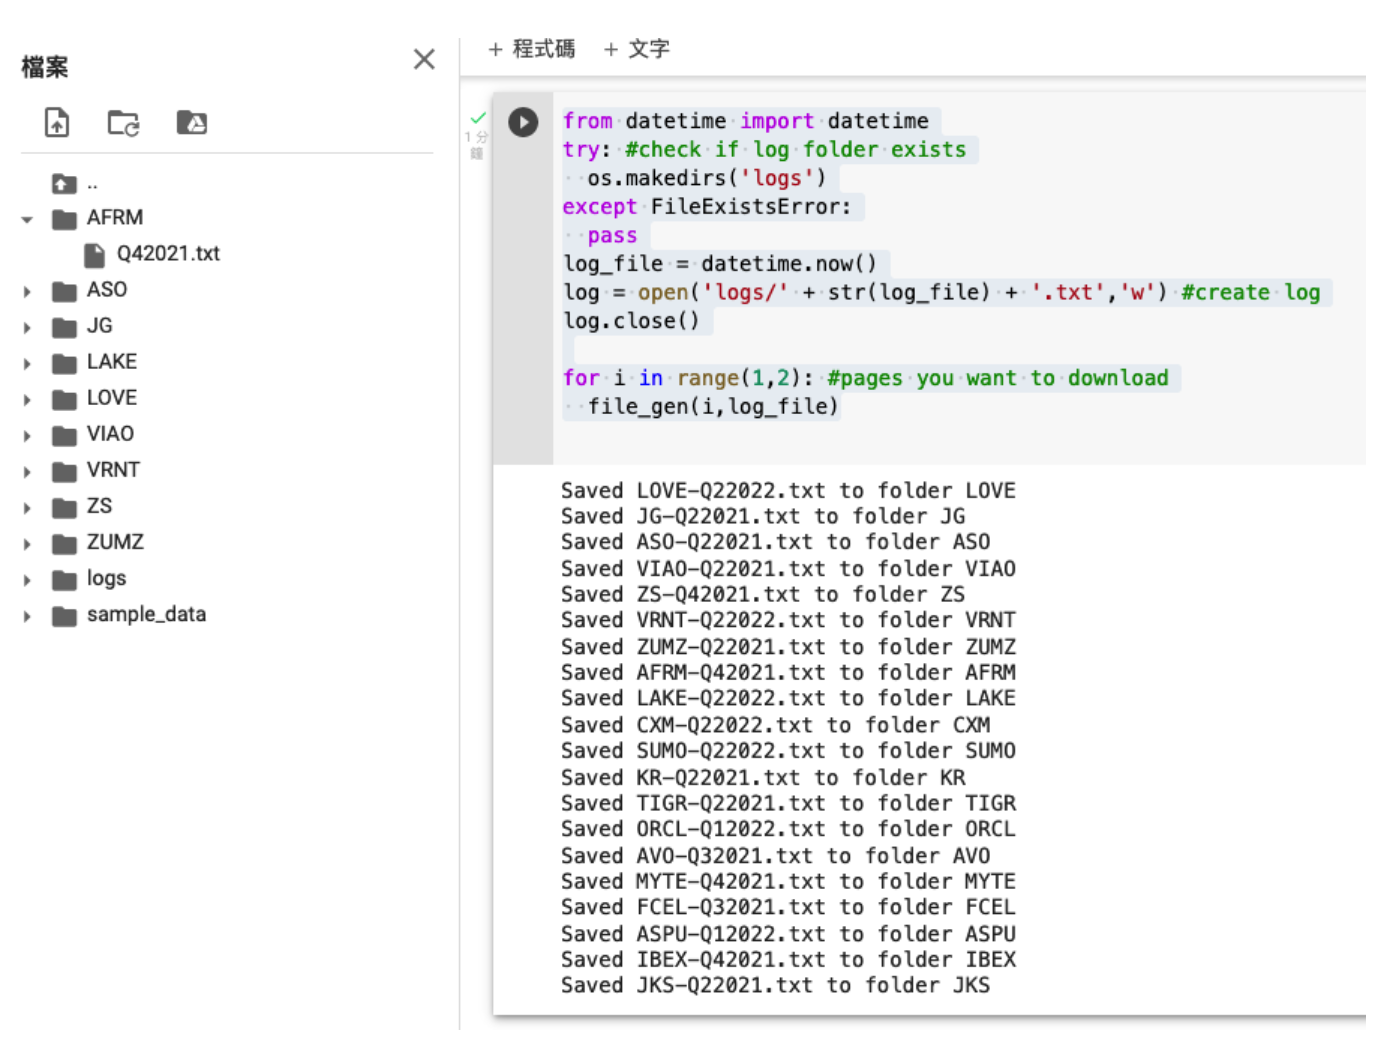